### Dimension Reduction Tutorial

What is Dimension reduction and when we should use dimension reduction? In fact if we have too many features supporse you have 1000 features, but you just want to do 2-classes classification problems and you just have 1000 samples, so you will have 1000 rows and 1000 columns of data sample matrix, if you just use Logistic Regression algorithm to fit the model, you will have 1000 weights... so many right? But maybe there are just 10 features will make the decision to classify! so why not we just make the data to be just 10 features means 10 dimensions, so that we could just make the model just to fit on these 10 features. 

But how could we find the 10 features to represent the 1000 features? this is dimension reduction! in fact, there are many ways to do this, but the most common is PCA, SVD and use deep learning to reduct the dimension of data.
These tutorial will just focus on PCA and SVD, if I have time, you will show you the deep learning algorithms...

In [1]:
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
import warnings

warnings.simplefilter('ignore')

# first make some samples datas, rows means samples and columns means features
data = np.random.random((1000, 1000))
# make sample label with randint from 0 to 2 with 1000 samples
label = np.random.randint(0, 2, size=(1000, ))

In [2]:
print('original data shape:', data.shape)
print("Unique label: ", np.unique(label))

# as we have data and label, so we could fit the model with logistic regression
lr = LogisticRegression()

lr.fit(data, label)

# the model score on the whole data, the model fitting step is not important here, I just want to show you the weights!
print("model score: ", lr.score(data, label))

# lr.coef_ is the weights after fit the model
# you could see that the weights have 1000D
print("model weights shape: ", lr.coef_.shape)

original data shape: (1000, 1000)
Unique label:  [0 1]
model score:  1.0
model weights shape:  (1, 1000)


In [3]:
# here we use PCA to make the data to lower dimension
# the most important parameter for PCA is `n_components` means how many dimensions that you want your new data to be.
pca = PCA(n_components=10)
print("PCA paramaters: ", pca.get_params())

# fit the model
pca.fit(data)

# convert original data to new data
new_data = pca.transform(data)

print("new data shape:", new_data.shape)

lr.fit(new_data, label)

print("new data score:", lr.score(new_data, label))

# this is the more important thing, new data fitted model weights shape!
# as you can see that for the new data, the weights is just 10!
# but the model accuracy is lower than before, so we should choose how many dimension that you should use during the work!
print("new data fitted on lr weights' shape: ", lr.coef_.shape)
print("new data lr weights: ", lr.coef_)


PCA paramaters:  {'copy': True, 'iterated_power': 'auto', 'n_components': 10, 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}
new data shape: (1000, 10)
new data score: 0.535
new data fitted on lr weights' shape:  (1, 10)
new data lr weights:  [[-0.00307752 -0.02038235 -0.12726397 -0.0713661  -0.10436164 -0.05740923
   0.04759382  0.03613644 -0.19775737  0.0008349 ]]


In [4]:
# here I just show you that with different dimension, we will have different accuracy score!
score_list = []
# what dimensions we want to choose
components_list = [10, 20, 50, 100, 200, 500]
for c in components_list:
    pca.n_components = c
    pca.fit(data)
    pca_data = pca.transform(data)
    lr.fit(pca_data, label)
    score_list.append(lr.score(pca_data, label))
    


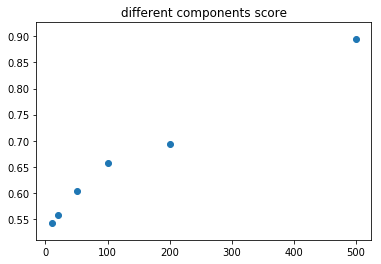

In [12]:
# after we have fit the model, then we would plot the score
import matplotlib.pyplot as plt

plt.scatter(components_list, score_list)
plt.title("different components score")
plt.show()

**One important thing**

In fact, we couldn't find the best components by using the model fitted than to get model test score! PCA uses the variance to judge how much information in data, so the real use case is use the variance_ratio to find the best components numbers. I will show you.

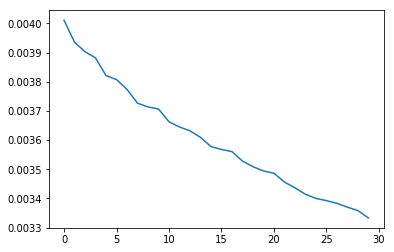

In [11]:
# to find the best components, we should make a new PCA object without setting n_components
pca = PCA()

# then just fit the data
pca.fit(data)

# the most important thing is to get the ratio list
variance_ratio_list = pca.explained_variance_ratio_

# as there are so many features, here I just choose first 30 components to show you,
# we have the plot, how many components we choose? For this plot, maybe 10 is better?
# this data made by myself, real data is really mass, so the curve shouldn't like this.
plt.plot(range(len(variance_ratio_list))[:30], variance_ratio_list[:30])
plt.show()

#### Tips:
As we can see that with different components, we do have different score, but here I just show the case, in the real life, we should use other technology to choose how many dimension we should choose, there is a trade-off between accuracy and inference time(as you have more weights, you have to do more computation and will be slower!) You should know this!

But we have do more is just to make the model more accurate for most case, in fact in big company, there should be like what I have said!

**Important thing**:

The PCA has some benifits, you should remember these!!!

1. reduce the data dimension to be lower, then you could get more variance data, so model could focus on important parts not on the unrelated features.
2. we could plot the high dimension data with PCA like to make the data to be 2D that we could plot.
3. reduce some noise feature influence the model training parts.


data shape: (150, 4)
new data shape: (150, 2)


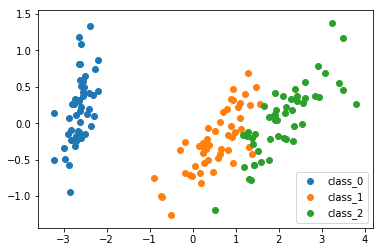

In [13]:
# here I show you that with PCA we could plot the data
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)

# you should know that iris data is 4D
print("data shape:", x.shape)

pca = PCA(n_components=2)
# we could even just use `fit_transform` to make the data to be 2D
x_new = pca.fit_transform(x)

print("new data shape:", x_new.shape)

# plot diference class with PCA result
uni_label = np.unique(y)

for i in range(len(uni_label)):
    plt.scatter(x_new[y==i, 0], x_new[y==i, 1], label='class_' + str(i))

plt.legend()

plt.show()

data shape: (150, 4)
new data shape: (150, 2)


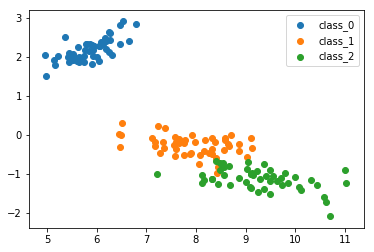

In [14]:
# PCA use many times in real life, but here I show you with another dimension reduction technology with SVD

from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)

# you should know that iris data is 4D
print("data shape:", x.shape)

svd = TruncatedSVD(n_components=2)
# we could even just use `fit_transform` to make the data to be 2D
x_new = svd.fit_transform(x)

print("new data shape:", x_new.shape)

# plot diference class with TruncatedSVD result
uni_label = np.unique(y)

for i in range(len(uni_label)):
    plt.scatter(x_new[y==i, 0], x_new[y==i, 1], label='class_' + str(i))

plt.legend()

plt.show()

You could see that both PCA and SVD will make the data to be lower dimension, but they will make the data to be different position like the plot show. But both solutions make the same class to be closer to each other, right? This is the powerful parts of dimension reduction!

### Final words

I have showed you that for the both parts for dimension reduction, after you have finished the whole parts, if you have any questions, just take a note and if I have time, I will explain to you!

You have noticed that for writing the code implement something is really easy, but the most important part is to know how these work? If you have time, you could search with GOOGLE with `PCA tutorial` something like that key words to find some more useful info that you could use. I really recommend you should take actions to read some english web that after you continue using english web, then one day you will find that it isn't so hard than you have ever thought just like me!